# Project: TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

# What questions can we come up with from this dataset?
1. What does the total number of movie releases look like by year?
2. How have average movie runtimes changed over the years?
3. What does the relationship between release year and revenue look like?
4. What does the relationship between runtime and revenue look like?

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
# Borrowed from stackoverflow to get numbers to show as float instead of scientific notation
# https://stackoverflow.com/questions/17737300/suppressing-scientific-notation-in-pandas/41023046
pd.options.display.float_format = '{:20,.2f}'.format

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.2MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.5MB/s eta 0:00:01   17% |█████▊                          | 2.4MB 38.4MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninstalled pandas-0.23.3


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('./Database_TMDb_movie_data/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,"137,999,939.28","1,392,445,892.52"
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,"137,999,939.28","348,161,292.49"
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,"101,199,955.47","271,619,025.41"
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,"183,999,919.04","1,902,723,129.80"
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,"174,799,923.09","1,385,748,801.47"


### Let's look at the size of the dataset, along with some quick information about the data, along with some histograms

In [4]:
# Size of the dataset
df.shape

(10866, 21)

In [5]:
# Statistics of dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,"10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00"
mean,"66,064.18",0.65,"14,625,701.09","39,823,319.79",102.07,217.39,5.97,"2,001.32","17,551,039.82","51,364,363.25"
std,"92,130.14",1.00,"30,913,213.83","117,003,486.58",31.38,575.62,0.94,12.81,"34,306,155.72","144,632,485.04"
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,"1,960.00",0.00,0.00
25%,"10,596.25",0.21,0.00,0.00,90.00,17.00,5.40,"1,995.00",0.00,0.00
50%,"20,669.00",0.38,0.00,0.00,99.00,38.00,6.00,"2,006.00",0.00,0.00
75%,"75,610.00",0.71,"15,000,000.00","24,000,000.00",111.00,145.75,6.60,"2,011.00","20,853,251.08","33,697,095.72"
max,"417,859.00",32.99,"425,000,000.00","2,781,505,847.00",900.00,"9,767.00",9.20,"2,015.00","425,000,000.00","2,827,123,750.41"


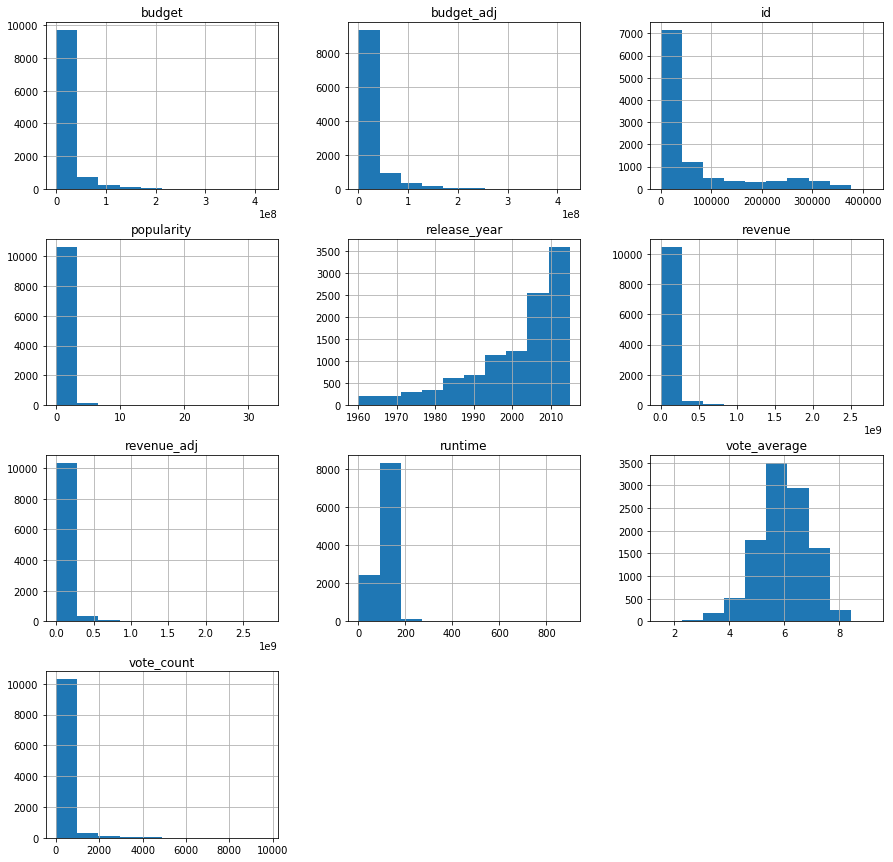

In [6]:
# Histograms of dataset
df.hist(figsize=(15,15));

### The above charts are just some quick histograms to get an idea what data is in the data set. Let's look into this data a little bit closer


In [8]:
# Check for duplicate rows
sum(df.duplicated())

1

### We just have 1 duplicate row, so we'll drop that

In [9]:
# Drop duplicate row
df.drop_duplicates(inplace = True)
sum(df.duplicated())

0

### With these questions, we can further clean the data by dropping columns that aren't needed, and by checking the data types of remaining columns to make sure they are the proper type

In [10]:
# Drop columns that aren't needed - 'id', 'imdb_id', 'popularity', 'budget',
# 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords',
# 'overview', 'production_companies', 'release_date', 'budget_adj', and 'revenue_adj'
df.drop(['id','imdb_id','popularity','budget','original_title', 'cast',
        'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies',
        'release_date', 'budget_adj', 'revenue_adj'], axis=1, inplace = True)

### Lets check out the data types for each remaining column

In [11]:
# Check data types for columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 6 columns):
revenue         10865 non-null int64
runtime         10865 non-null int64
genres          10842 non-null object
vote_count      10865 non-null int64
vote_average    10865 non-null float64
release_year    10865 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 594.2+ KB


In [12]:
type(df['release_year'][0])

numpy.int64

### Let's look at the dataset one more time to see if anything else needs to be cleaned up

In [13]:
# Statistics of dataset
df.describe()

,revenue,runtime,vote_count,vote_average,release_year
count,"10,865.00","10,865.00","10,865.00","10,865.00","10,865.00"
mean,"39,826,896.08",102.07,217.40,5.98,"2,001.32"
std,"117,008,277.46",31.38,575.64,0.94,12.81
min,0.00,0.00,10.00,1.50,"1,960.00"
25%,0.00,90.00,17.00,5.40,"1,995.00"
50%,0.00,99.00,38.00,6.00,"2,006.00"
75%,"24,000,000.00",111.00,146.00,6.60,"2,011.00"
max,"2,781,505,847.00",900.00,"9,767.00",9.20,"2,015.00"


### The 'runtime' column has some entries of 0. For this situation, we'll fill them in with an average of the 'runtime' column. This seems like a better way to handle it rather than just deleting rows with '0' for the runtime.

In [14]:
# Replace '0' values with average of 'runtime' column
runtime_avg = df['runtime']
runtime_avg.replace(0, runtime_avg.mean(), inplace=True)
df.describe()

,revenue,runtime,vote_count,vote_average,release_year
count,"10,865.00","10,865.00","10,865.00","10,865.00","10,865.00"
mean,"39,826,896.08",102.36,217.40,5.98,"2,001.32"
std,"117,008,277.46",30.90,575.64,0.94,12.81
min,0.00,2.00,10.00,1.50,"1,960.00"
25%,0.00,90.00,17.00,5.40,"1,995.00"
50%,0.00,99.00,38.00,6.00,"2,006.00"
75%,"24,000,000.00",111.00,146.00,6.60,"2,011.00"
max,"2,781,505,847.00",900.00,"9,767.00",9.20,"2,015.00"


### The 'runtime' column now has a min of 2 (very short movie), and a slightly higher average now that we replaced '0' with the average of 'runtime'.

In [15]:
df.head()

,revenue,runtime,genres,vote_count,vote_average,release_year
0,1513528810,124.00,Action|Adventure|Science Fiction|Thriller,5562,6.50,2015
1,378436354,120.00,Action|Adventure|Science Fiction|Thriller,6185,7.10,2015
2,295238201,119.00,Adventure|Science Fiction|Thriller,2480,6.30,2015
3,2068178225,136.00,Action|Adventure|Science Fiction|Fantasy,5292,7.50,2015
4,1506249360,137.00,Action|Crime|Thriller,2947,7.30,2015


### Looking at the data above, we see that 'genres' has multiple entries, separated by a "|". These strings will be split in Python later.

<a id='eda'></a>
# Exploratory Data Analysis

## Research Question 1 - What does the total number of movie releases look like by year?

In [16]:
# Group and count movies by year
movie_by_year = df.groupby(['release_year'])['release_year'].count()
movie_by_year.head()

release_year
1960    32
1961    31
1962    32
1963    34
1964    42
Name: release_year, dtype: int64

In [17]:
movie_by_year.tail()

release_year
2011    540
2012    588
2013    659
2014    700
2015    629
Name: release_year, dtype: int64

### So we see with the limited information from .head() and .tail() above that the 1960's started out with 30-40 movies released per year, and by the time we get to the 2010's, we're in the 500-700 range of releases per year. What does that chart look like?

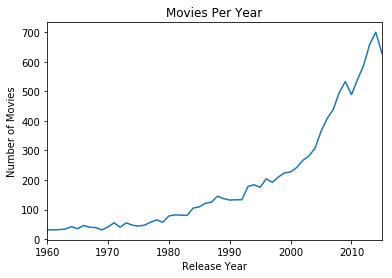

In [18]:
movie_by_year.plot();
plt.title("Movies Per Year");
plt.xlabel('Release Year');
plt.ylabel('Number of Movies');

### While accurate, this chart can be prettied up a bit so it is easier to see what is going on.

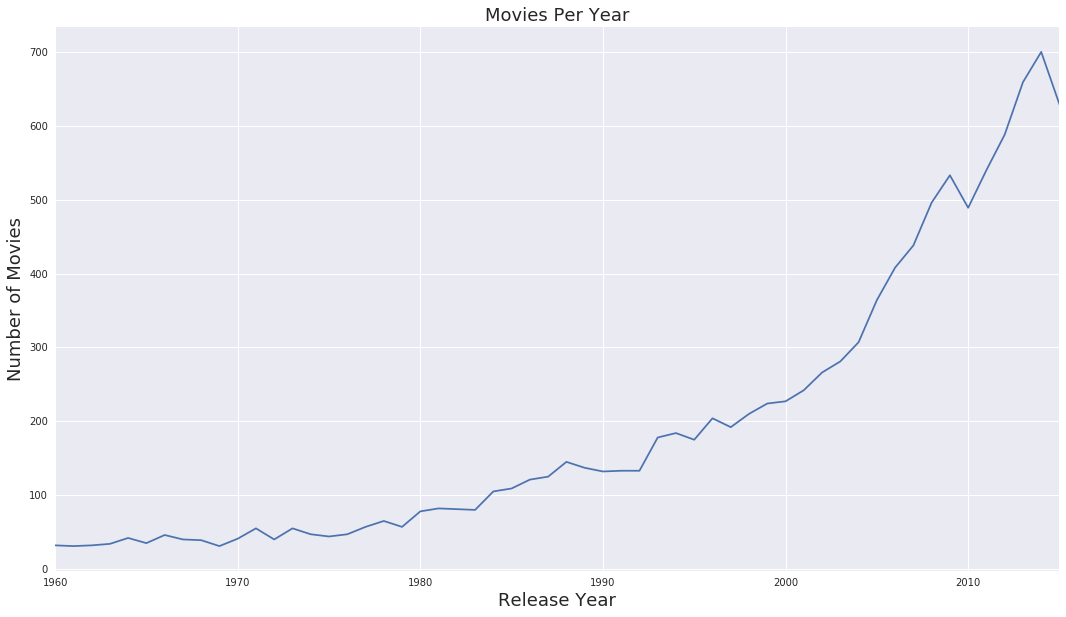

In [20]:
# Use seaborn and labels to change the look of the chart
movie_by_year.plot()
sns.set(rc={'figure.figsize':(18,10)})
plt.title("Movies Per Year",fontsize = 18)
plt.xlabel('Release Year',fontsize = 18)
plt.ylabel('Number of Movies',fontsize = 18)
sns.set_style("darkgrid");

### The above chart lines up with the .head() and .tail() shown previously where we start out with 30-40 movies a year, and end in the 500-700 range. This chart also shows the first rise in movies per year around the 1980s, and the real explosion in numbers around 2005

## Research Question 2 - How have average movie runtimes changed over the years?

In [21]:
# Average of movie runtimes per year
runtime = df.groupby(['release_year'])['runtime'].mean()
runtime.head()

release_year
1960                 110.66
1961                 119.42
1962                 124.34
1963                 111.32
1964                 109.21
Name: runtime, dtype: float64

In [22]:
runtime.tail()

release_year
2011                  98.49
2012                  98.32
2013                  96.82
2014                  98.77
2015                  97.51
Name: runtime, dtype: float64

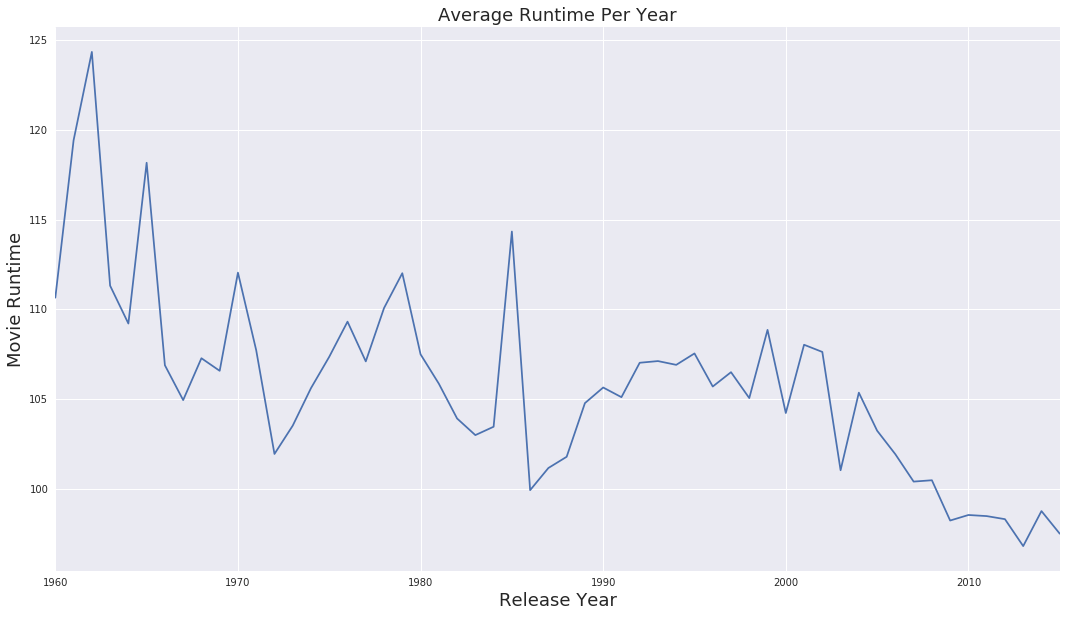

In [23]:
# Use seaborn and labels to change the look of the chart
runtime.plot()
sns.set(rc={'figure.figsize':(18,10)})
plt.title("Average Runtime Per Year",fontsize = 18)
plt.xlabel('Release Year',fontsize = 18)
plt.ylabel('Movie Runtime',fontsize = 18)
sns.set_style("darkgrid");


### Here we see the trend of movies getting shorter and shorter over the years. In the 1960s, movie runtimes were averaging near the 2 hour long mark (110-120 minutes). Fast forward to the 2010s, and movies are averaging in the mid to high 90 minute range (96-98 minutes), a drop of 15-20 minutes. 

## Research Question 3 - What does the relationship between release year and revenue look like?

### Adding a function to make scatter plots easier to print

In [27]:
def scatter_plot(xvar, yvar, xlabel, ylabel, sc_title):
    # this funciton will make it easier to create scatter plots, just call the
    # x variable and y variable. The titles and labels will still need to
    # be defined separately
    plt.figure(figsize=(12, 12))
    plt.scatter(df[xvar], df[yvar], alpha=0.3);
    plt.title(sc_title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

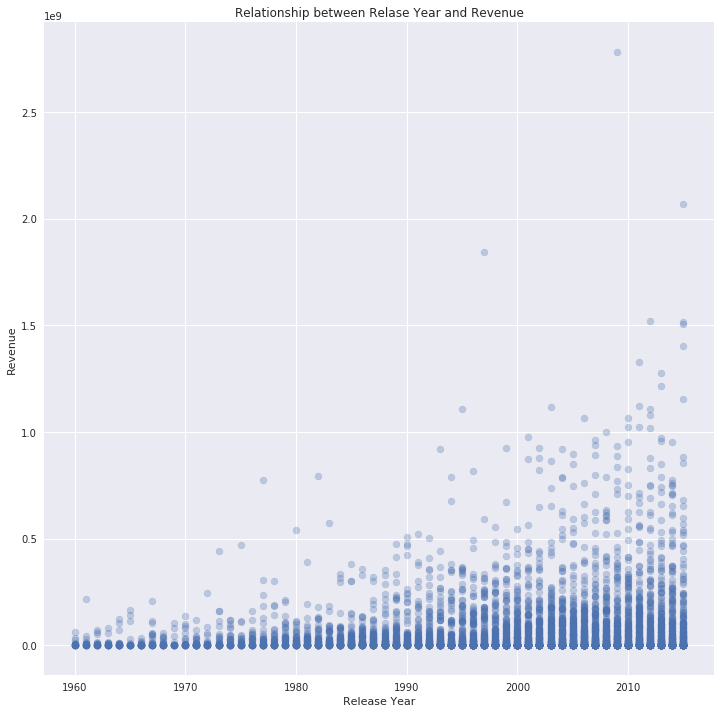

In [29]:
scatter_plot('release_year', 'revenue', 'Release Year', 'Revenue', 'Relationship between Relase Year and Revenue')

### In this chart, we see that most of the movies make under \\$250 million. It isn't until the late 1970's that we see a movie get to the \\$500 million mark, and the early 1990's when we see one make over \\$1 bilion (not adjusted for inflation)

## Research Question 4 - What does the relationship between runtime and revenue look like?

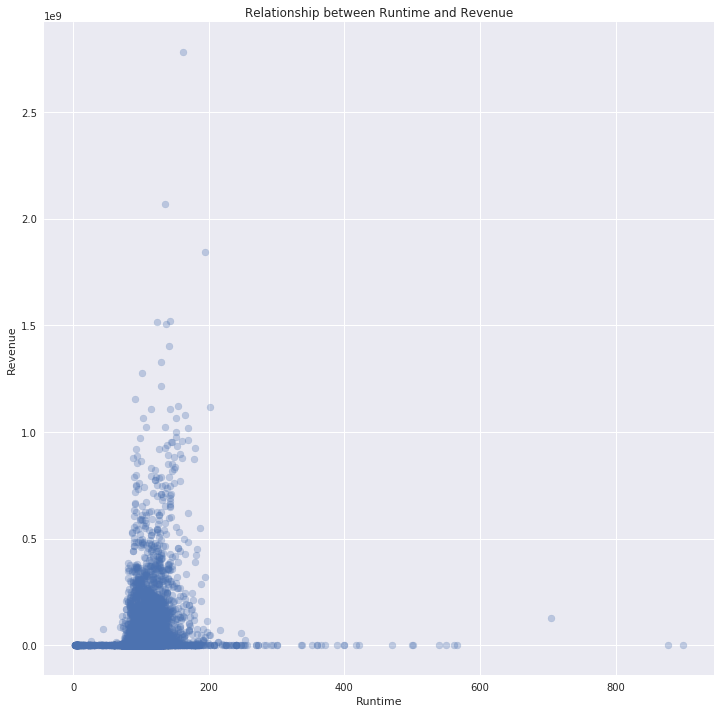

In [30]:
scatter_plot('runtime', 'revenue', 'Runtime', 'Revenue', 'Relationship between Runtime and Revenue')

### Here we see that the sweet spot for revenue is a runtime between 2 and 3 hours. As movies get to be above that length, the revenue drops off substantially.

<a id='conclusions'></a>
# Conclusions

For the movies per year, we can see that in the last 4 decades, and especially since 2005, the releases per year is generally on the upswing. This could be that as the population grows and the studios make more and more money, the pool of everyone - writers, directors, producers, actors - gets bigger and bigger and stuidos have more money to put towards movies, so more movies are made to try and get more opportunites to make more money, keeping that cycle going. This would be something that would need further research to gather more information.

The drop-off in movie times in 2005 coincides with the explosion of movie releases in that same year. Perhaps studios are rushing to get more movies out, spending less time on each movie, part of which could be big edits to content that affects runtime. Or maybe the movies are getting shorter so the special effects departments have less CGI to put into the movies. It could also be an attention-span issue of the audiences. With rare exceptions, no one really likes seeing 2-3 hour long movies anymore, so studios are catering towards that. This would be an interesting thing to look into further as well.

The dataset has a total of 10,865 movies. Removing some columns as part of the data cleanup process, the current dataset doesn't have any issues with missing data. The complete dataset does have some missing data, so this would need to be addressed if other analysis is done.

The data set also has a good size of data to look at, but the data isn't very symmetrical. For example, look at the ``` movie_by_year.head() ``` and ``` movie_by_year.tail() ``` lines of code. The first set of code shows 30-40 movies a year in the early 1960's, and the second set of code shows 540 all the way up to 700 movies a year in the early 2010's. The early 2010's acount for 15-20 times more movies per year than the early 1960's, so the data is much more detailed as the years go on. The data might be more accurate if there were approximately an even number of movies per year for all years in the data set. To be even more accurate, it would be best to get a dataset that has all the movies made for every year in the dataset.